In [50]:
import numpy as np
import pandas as pd
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [29]:
np.sum(data['bmi'])

141836.90000000002

In [51]:
data[data.bmi.isnull()].head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1


In [18]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [36]:
data_filter = data.dropna(how='any')

In [41]:
data_filter.head()
sum(data_filter['bmi'])

141836.90000000005

In [42]:
data['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [45]:
np.mean(data['bmi']), np.average(data_filter['bmi'])

(28.893236911794673, 28.893236911794663)

In [61]:
data['bmi'].fillna(value=np.mean(data['bmi']), inplace=True)

In [62]:
data['bmi'].value_counts(dropna=False)

28.893237    201
28.700000     41
28.400000     38
27.600000     37
26.700000     37
            ... 
11.500000      1
40.600000      1
53.900000      1
97.600000      1
14.900000      1
Name: bmi, Length: 419, dtype: int64

In [63]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfle = data
# MultiColumnLabelEncoder(columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 
#                                    'smoking_status']).fit_transform(dfle)
cols=['gender', 'ever_married', 'work_type', 'Residence_type', 
                                   'smoking_status']
dfle[cols] = dfle[cols].apply(LabelEncoder().fit_transform)

In [65]:
dfle.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [75]:
X = np.asarray(dfle.drop(columns=['stroke']))
y = np.asarray(dfle['stroke'])
X.shape, y.shape

((5110, 11), (5110,))

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_data = scaler.transform(X)
pd.DataFrame(X_data).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.123214,0.5,0.816895,0.0,1.0,1.0,0.50,1.0,0.801265,0.301260,0.333333
1,0.708205,0.0,0.743652,0.0,0.0,1.0,0.75,0.0,0.679023,0.212981,0.666667
2,0.426015,0.5,0.975586,0.0,1.0,1.0,0.50,0.0,0.234512,0.254296,0.666667
3,0.824928,0.0,0.597168,0.0,0.0,1.0,0.50,1.0,0.536008,0.276060,1.000000
4,0.021929,0.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.549349,0.156930,0.666667


In [98]:
np.random.seed(10)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=10, stratify=y) 

In [99]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [100]:
model.score(X_train,y_train), model.score(X_test,y_test)

(1.0, 0.9119373776908023)

In [101]:
from sklearn.linear_model import LogisticRegression
model_lg = LogisticRegression()
model_lg.fit(X_train, y_train)

LogisticRegression()

In [102]:
model_lg.score(X_train,y_train), model_lg.score(X_test,y_test)

(0.951320939334638, 0.9510763209393346)

In [103]:
y_pred = model_lg.predict(X_test)
y_pred2 = model.predict(X_test)
y_pred, y_test

(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [104]:
pd.DataFrame(y_pred2).value_counts(), pd.DataFrame(y_test).value_counts()

(0    956
 1     66
 dtype: int64,
 0    972
 1     50
 dtype: int64)

In [109]:
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)
y_pred_svm = model.predict(X_test)
model_svm.score(X_train,y_train), model_svm.score(X_test,y_test)

(0.951320939334638, 0.9510763209393346)

<AxesSubplot:>

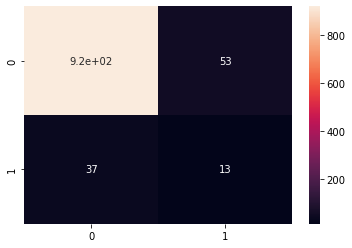

In [110]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_svm)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred_svm)

import seaborn as sn
sn.heatmap(matrix, annot = True)